## Import Libraries & Data

In [4]:
conda install quandl



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') 

In [6]:
# Configure API key 

quandl.ApiConfig.api_key = 'WkeTmyZLteWMGZn8wecN'

In [7]:
# Import Quandl Data

data = quandl.get('RATEINF/CPI_USA')

In [8]:
data.tail(5)

,Value
Date,
2022-12-31,296.797
2023-01-31,299.170
2023-02-28,300.840
2023-03-31,301.836
2023-04-30,303.363


In [9]:
data.shape

(1324, 1)

In [10]:
data.columns

Index(['Value'], dtype='object')

In [11]:
type(data)

pandas.core.frame.DataFrame

## Subsetting & Wrangling

In [12]:
# Creating subset

data_2 = data.reset_index()

In [13]:
data_2.columns

Index(['Date', 'Value'], dtype='object')

In [14]:
data_sub = data_2.loc[(data_2['Date'] >= '2013-01-01') & (data_2['Date'] < '2018-12-31')]

In [15]:
data_sub.columns

Index(['Date', 'Value'], dtype='object')

In [16]:
# Setting date as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub.set_index('datetime', inplace=True)
data_sub.drop(['Date'], axis=1, inplace=True)
data_sub.head()

,Value
datetime,
2013-01-31,230.280
2013-02-28,232.166
2013-03-31,232.773
2013-04-30,232.531
2013-05-31,232.945


I selected data from only 2013-2018 because that is the timeframe of my gun violence data.

In [17]:
data_sub.shape

(71, 1)

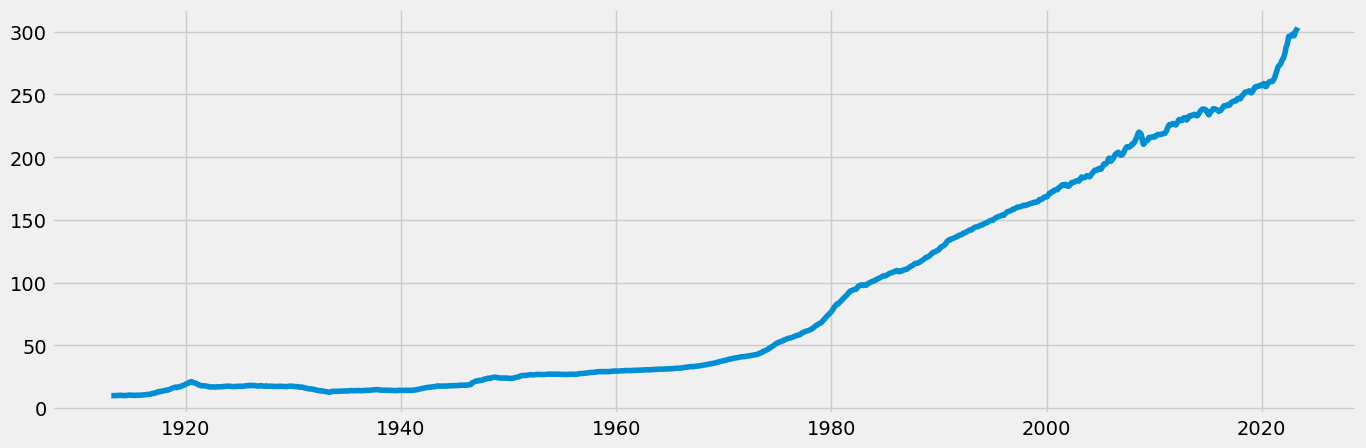

In [18]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [19]:
# Check for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [20]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

## Time Series Analysis: Decomposition

In [21]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [22]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

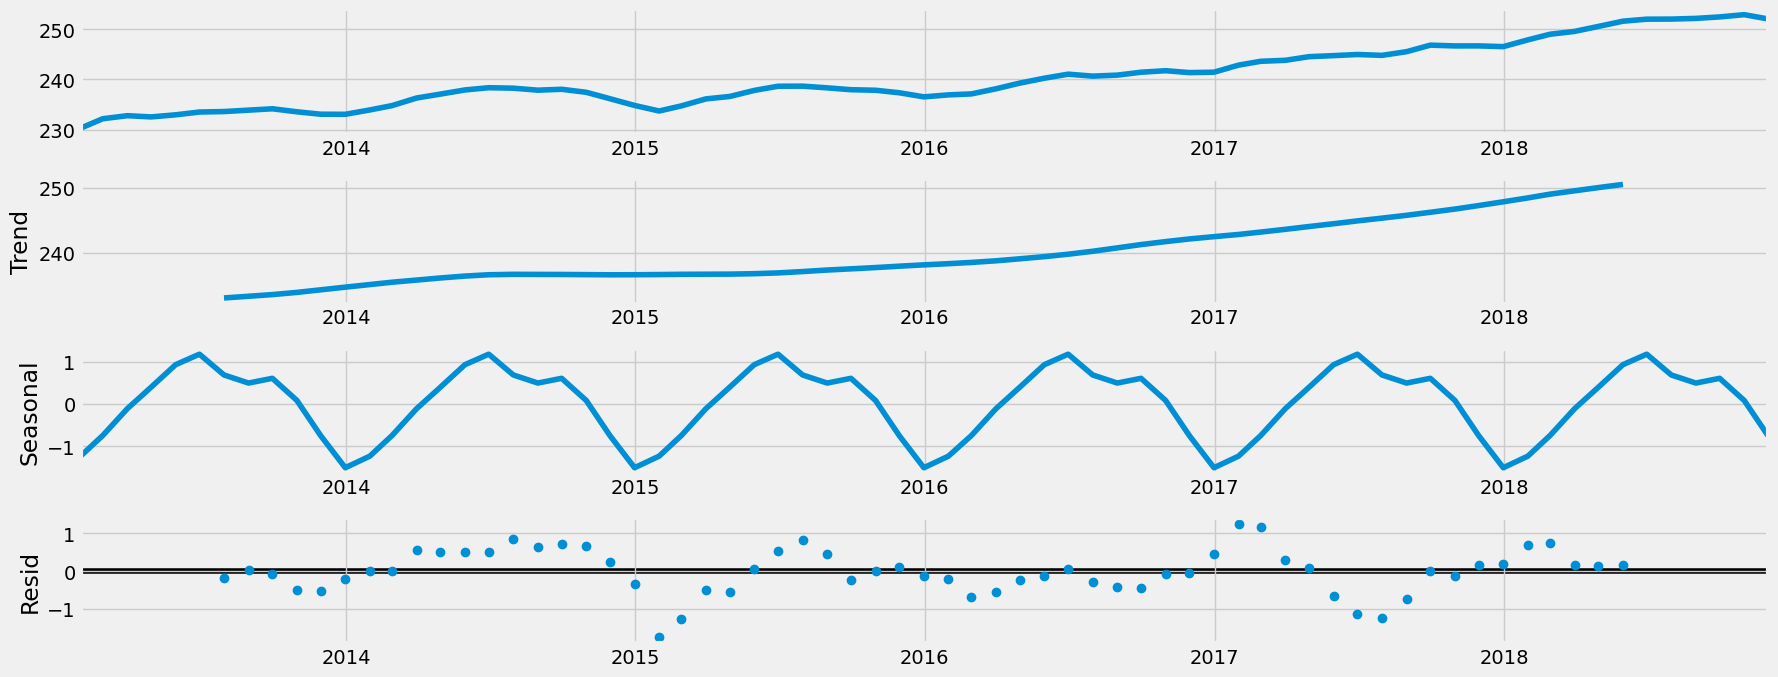

In [23]:
# Plot the separate components

decomposition.plot()
plt.show()

The decomposition shows us a few things. First, there is an upward trend throughout the years. Next, there is seasonality. An uptick in the middle of the year, a drop, then another slightly lower uptick. The residuals show us that there are some unexplained noise in the data set. There doesn't look to be a pattern in it so it doesn't need further analysis.

## Testing for stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.974176
p-value                         0.993986
Number of Lags Used             6.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


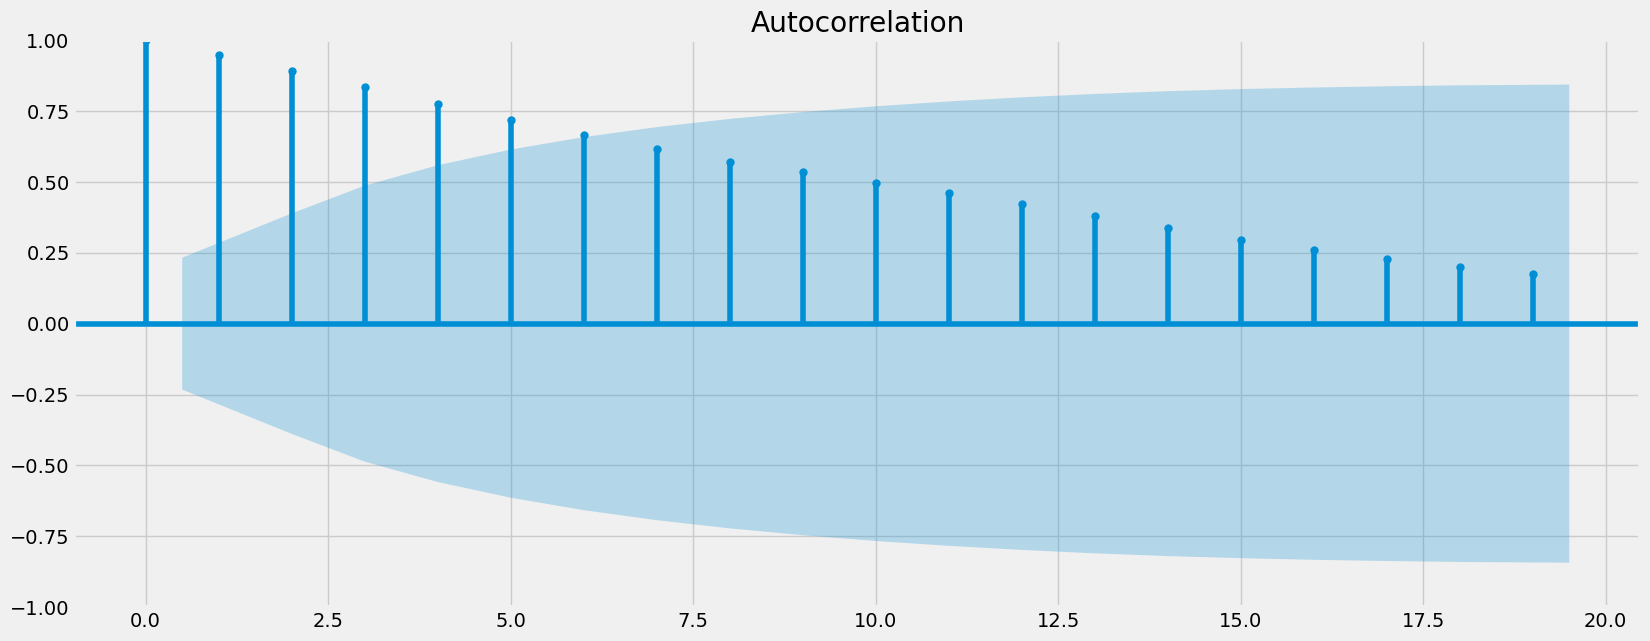

In [25]:
# Plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

## Stationarizing the Inflation Rate Data

In [26]:
data_diff = data_sub - data_sub.shift(1)

In [27]:
data_diff.dropna(inplace = True)

In [28]:
data_diff.head()

,Value
datetime,
2013-02-28,1.886
2013-03-31,0.607
2013-04-30,-0.242
2013-05-31,0.414
2013-06-30,0.559


In [29]:
data_diff.columns

Index(['Value'], dtype='object')

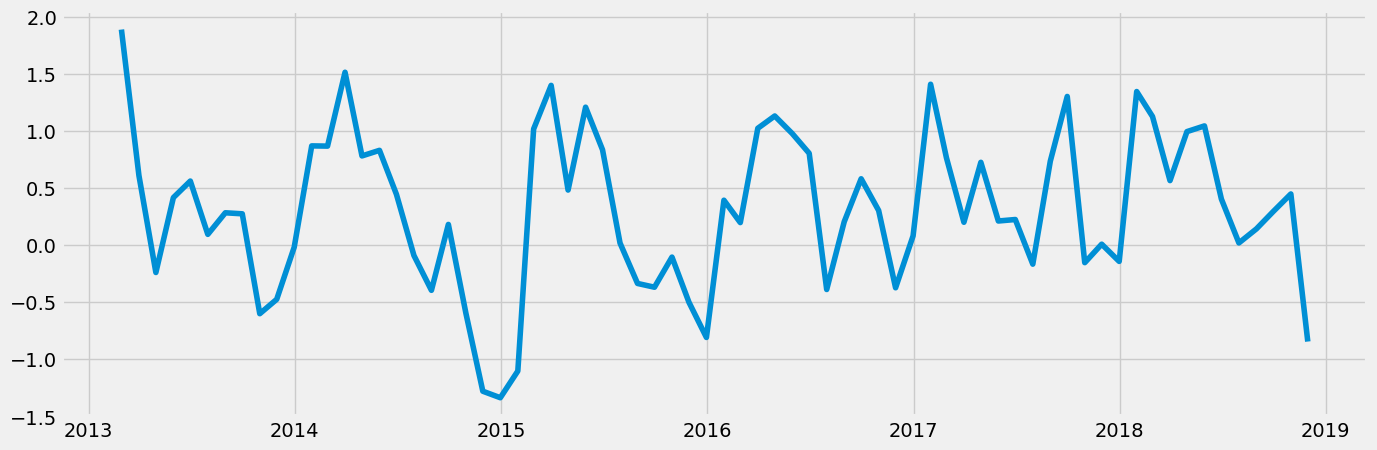

In [30]:
# Plot what differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [31]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.484817
p-value                         0.541008
Number of Lags Used            11.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


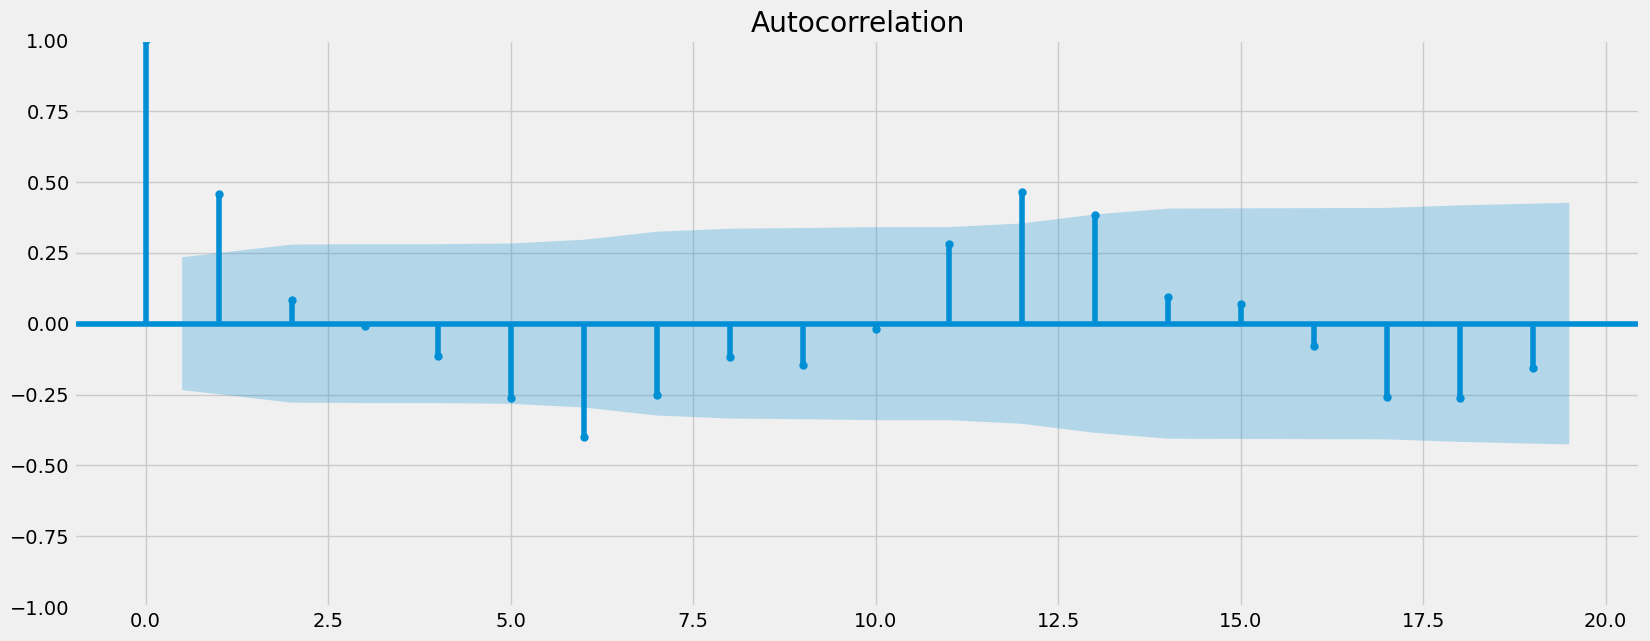

In [32]:
plot_acf(data_diff)
plt.show()

In [33]:
# Another form of differencing

data_diff_2 = data_diff - data_diff.shift(1)

In [34]:
data_diff_2.dropna(inplace = True)

In [35]:
data_diff_2.head()

,Value
datetime,
2013-03-31,-1.279
2013-04-30,-0.849
2013-05-31,0.656
2013-06-30,0.145
2013-07-31,-0.467


In [36]:
data_diff_2.columns

Index(['Value'], dtype='object')

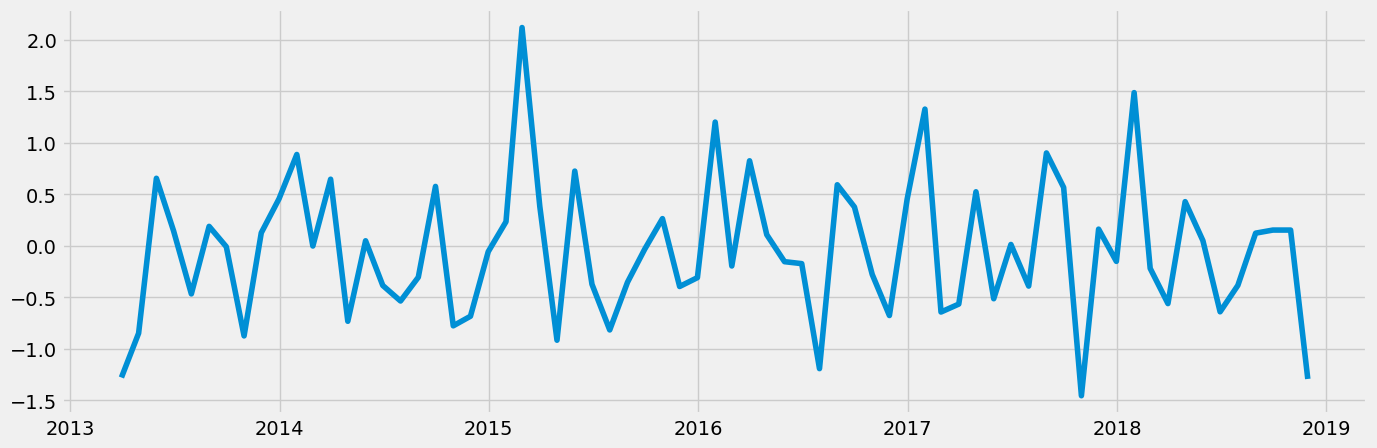

In [37]:
# plot what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [38]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -5.976025e+00
p-value                        1.886664e-07
Number of Lags Used            1.000000e+01
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


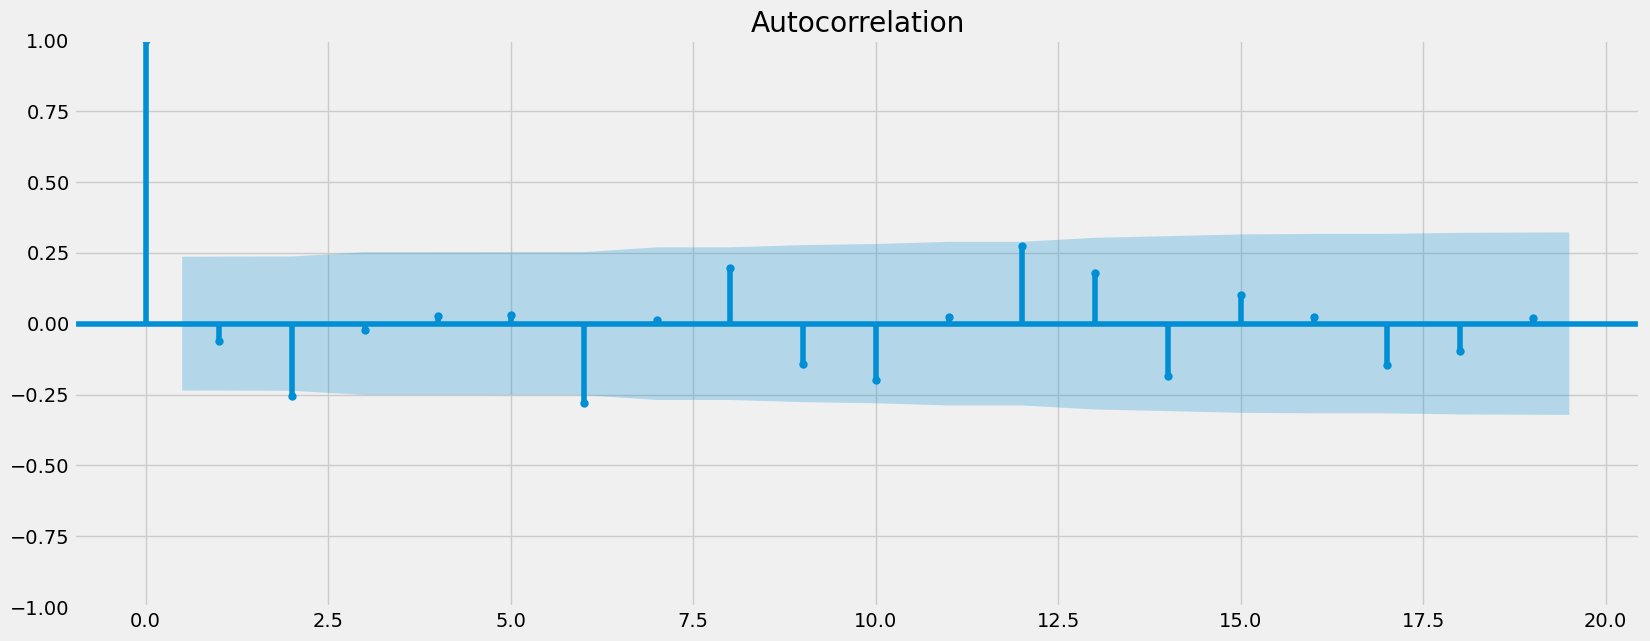

In [39]:
plot_acf(data_diff_2)
plt.show()

I differenced the data 2 times because my data was not yet stationary. I was looking for a p-value of less than .05. 